In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
Player_metric_DF = pd.read_csv(r"C:\Users\jorda\Documents\Concordia Boot Camp\Lectures\NHL_Player_Metrics_P20.csv")
Player_metric_DF['Age'] = Player_metric_DF['Age'].fillna(0)
Player_metric_DF['Position'] = Player_metric_DF['Position'].fillna('G')
Player_metric_DF = Player_metric_DF[Player_metric_DF['Position']!='G']


(17.0, 33.0)

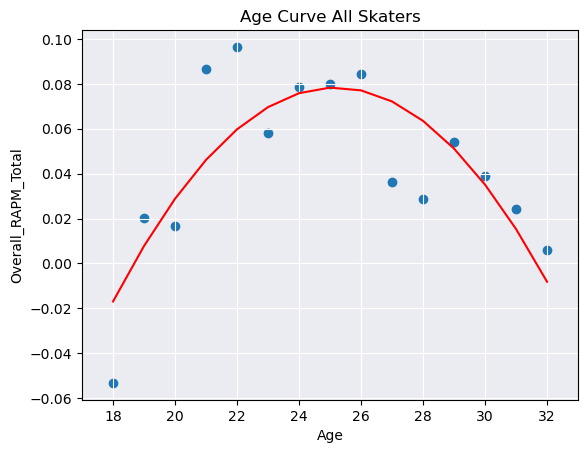

In [13]:
AVG_RAPM_BY_AGE = Player_metric_DF
#AVG_RAPM_BY_AGE = AVG_RAPM_BY_AGE[AVG_RAPM_BY_AGE['Position']!='D']
AVG_RAPM_BY_AGE = AVG_RAPM_BY_AGE[AVG_RAPM_BY_AGE['Games_Played']>=60]
AVG_RAPM_BY_AGE = AVG_RAPM_BY_AGE.groupby(['Age'], as_index=False)['total'].mean()
AVG_RAPM_BY_AGE = pd.DataFrame(AVG_RAPM_BY_AGE)
AVG_RAPM_BY_AGE = AVG_RAPM_BY_AGE[AVG_RAPM_BY_AGE['Age']<=32]
AVG_RAPM_BY_AGE = AVG_RAPM_BY_AGE[AVG_RAPM_BY_AGE['Age']>=18]

AVG_RAPM_BY_AGE['intercept'] = 1
AVG_RAPM_BY_AGE['Age2'] = AVG_RAPM_BY_AGE['Age']**2
x = AVG_RAPM_BY_AGE[['intercept','Age2','Age']]
y = AVG_RAPM_BY_AGE['total']

agecurve = sm.OLS(y,x)
results = agecurve.fit()
age_curve_vals = results.predict(x)

ax = plt.subplot()

ax.plot(AVG_RAPM_BY_AGE['Age'], age_curve_vals, color='red')
ax.scatter(AVG_RAPM_BY_AGE['Age'], AVG_RAPM_BY_AGE['total'])
ax.set_title('Age Curve All Skaters')
ax.set_ylabel('Overall_RAPM_Total')
ax.set_xlabel('Age')
ax.grid(True)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))
ax.set_xlim(17, 33)
#ax.xticks(ticks=range(17,36,2))

(17.0, 33.0)

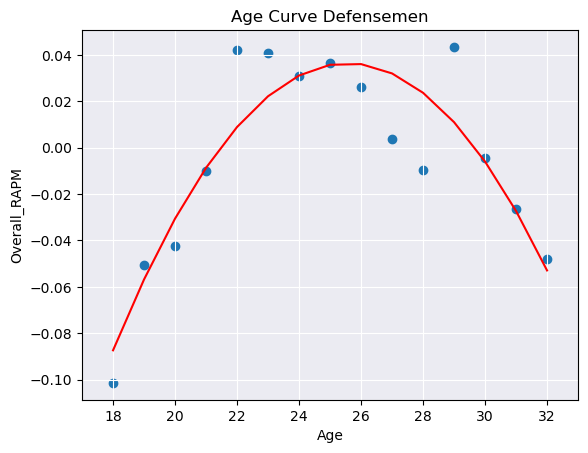

In [14]:
# overal curve Defense

AVG_RAPM_BY_AGE_D = Player_metric_DF
AVG_RAPM_BY_AGE_D = AVG_RAPM_BY_AGE_D[AVG_RAPM_BY_AGE_D['Position']=='D']
AVG_RAPM_BY_AGE_D = AVG_RAPM_BY_AGE_D[AVG_RAPM_BY_AGE_D['Games_Played']>=60]
AVG_RAPM_BY_AGE_D = AVG_RAPM_BY_AGE_D.groupby(['Age'], as_index=False)['total'].mean()
AVG_RAPM_BY_AGE_D = pd.DataFrame(AVG_RAPM_BY_AGE_D)
AVG_RAPM_BY_AGE_D = AVG_RAPM_BY_AGE_D[AVG_RAPM_BY_AGE_D['Age']<=32]
AVG_RAPM_BY_AGE_D = AVG_RAPM_BY_AGE_D[AVG_RAPM_BY_AGE_D['Age']>=18]



AVG_RAPM_BY_AGE_D['intercept'] = 1
AVG_RAPM_BY_AGE_D['Age2'] = AVG_RAPM_BY_AGE['Age']**2
x_D = AVG_RAPM_BY_AGE_D[['intercept','Age2','Age']]
y_D = AVG_RAPM_BY_AGE_D['total']


agecurve_D = sm.OLS(y_D,x_D)
results_D = agecurve_D.fit()


age_curve_vals_D = results_D.predict(x_D)

# overal curve Forward

ax = plt.subplot()

ax.plot(AVG_RAPM_BY_AGE_D['Age'], age_curve_vals_D, color='red')
ax.scatter(AVG_RAPM_BY_AGE_D['Age'], AVG_RAPM_BY_AGE_D['total'])
ax.set_title('Age Curve Defensemen')
ax.set_ylabel('Overall_RAPM')
ax.set_xlabel('Age')
ax.grid(True)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))
ax.set_xlim(17, 33)
#plt.xticks(ticks=range(17,36,2))

(17.0, 33.0)

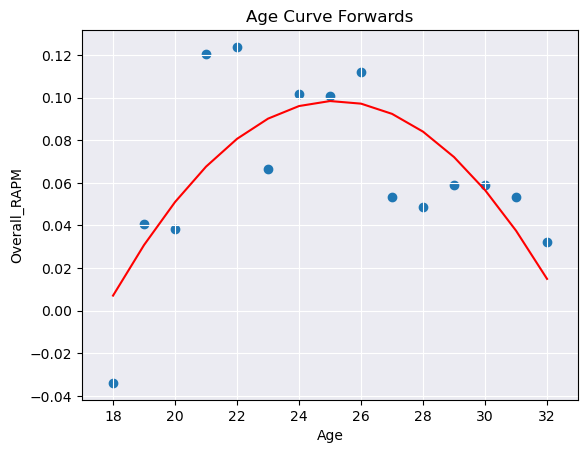

In [5]:
AVG_RAPM_BY_AGE_F = Player_metric_DF
AVG_RAPM_BY_AGE_F = AVG_RAPM_BY_AGE_F[AVG_RAPM_BY_AGE_F['Position']!='D']
AVG_RAPM_BY_AGE_F = AVG_RAPM_BY_AGE_F[AVG_RAPM_BY_AGE_F['Games_Played']>=60]
AVG_RAPM_BY_AGE_F = AVG_RAPM_BY_AGE_F.groupby(['Age'], as_index=False)['total'].mean()
AVG_RAPM_BY_AGE_F = pd.DataFrame(AVG_RAPM_BY_AGE_F)
AVG_RAPM_BY_AGE_F = AVG_RAPM_BY_AGE_F[AVG_RAPM_BY_AGE_F['Age']<=32]
AVG_RAPM_BY_AGE_F = AVG_RAPM_BY_AGE_F[AVG_RAPM_BY_AGE_F['Age']>=18]


AVG_RAPM_BY_AGE_F['intercept'] = 1
AVG_RAPM_BY_AGE_F['Age2'] = AVG_RAPM_BY_AGE['Age']**2
x_F = AVG_RAPM_BY_AGE_F[['intercept','Age2','Age']]
y_F = AVG_RAPM_BY_AGE_F['total']

agecurve_F = sm.OLS(y_F,x_F)
results_F = agecurve_F.fit()


age_curve_vals_F = results_F.predict(x_F)

ax = plt.subplot()

ax.plot(AVG_RAPM_BY_AGE_F['Age'], age_curve_vals_F, color='red')
ax.scatter(AVG_RAPM_BY_AGE_F['Age'], AVG_RAPM_BY_AGE_F['total'])
ax.set_title('Age Curve Forwards')
ax.set_ylabel('Overall_RAPM')
ax.set_xlabel('Age')
ax.grid(True)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))
ax.set_xlim(17, 33)
#plt.xticks(ticks=range(17,36,2))

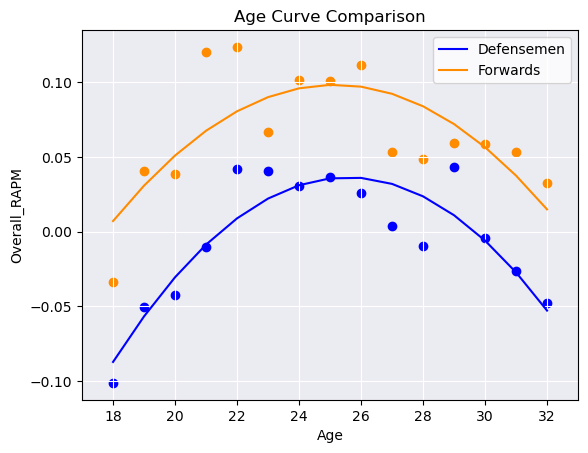

In [6]:
ax = plt.subplot()

#ax.plot(AVG_RAPM_BY_AGE_F['Age'], age_curve_vals_C, color='red', label = 'Centers')
#ax.plot(AVG_RAPM_BY_AGE_F['Age'], age_curve_vals_W, color='green', label = 'Wingers')
ax.plot(AVG_RAPM_BY_AGE_F['Age'], age_curve_vals_D, color='blue', label = 'Defensemen')
ax.plot(AVG_RAPM_BY_AGE_F['Age'], age_curve_vals_F, color='darkorange', label = 'Forwards')
ax.scatter(AVG_RAPM_BY_AGE_F['Age'], AVG_RAPM_BY_AGE_D['total'], color='blue')
ax.scatter(AVG_RAPM_BY_AGE_F['Age'], AVG_RAPM_BY_AGE_F['total'], color='darkorange')

age_curve_vals_F
ax.set_title('Age Curve Comparison')
ax.set_ylabel('Overall_RAPM')
ax.set_xlabel('Age')
ax.grid(True)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))
ax.set_xlim(17, 33)
ax.legend(loc='upper right')

In [9]:
# Forwards consistantly provide more value througout their Career.
# Defenseman and Forwards both peak from around ages 22-26.
# There is a large shift downwards at the age of 27, which is when many players start their first UFA contract.
# Defenseman begin their career at a position much lower than their peak. 
# Defensemen also acclimate and decline at a higher rate than forwards (shorter careers).

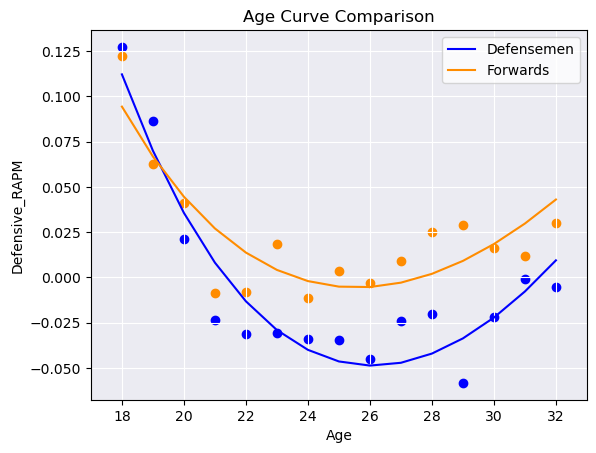

In [17]:


####################################################################################################################
AVG_RAPM_BY_AGE_F = Player_metric_DF
AVG_RAPM_BY_AGE_F = AVG_RAPM_BY_AGE_F[AVG_RAPM_BY_AGE_F['Position']!='D']
AVG_RAPM_BY_AGE_F = AVG_RAPM_BY_AGE_F[AVG_RAPM_BY_AGE_F['Games_Played']>=60]
AVG_RAPM_BY_AGE_F = AVG_RAPM_BY_AGE_F.groupby(['Age'], as_index=False)['Defensive_RAPM'].mean()
AVG_RAPM_BY_AGE_F = pd.DataFrame(AVG_RAPM_BY_AGE_F)
AVG_RAPM_BY_AGE_F = AVG_RAPM_BY_AGE_F[AVG_RAPM_BY_AGE_F['Age']<=32]
AVG_RAPM_BY_AGE_F = AVG_RAPM_BY_AGE_F[AVG_RAPM_BY_AGE_F['Age']>=18]


AVG_RAPM_BY_AGE_F['intercept'] = 1
AVG_RAPM_BY_AGE_F['Age2'] = AVG_RAPM_BY_AGE['Age']**2
AVG_RAPM_BY_AGE_F['Age_x'] = 1/AVG_RAPM_BY_AGE['Age']
x_F = AVG_RAPM_BY_AGE_F[['intercept','Age2','Age_x']]
y_F = AVG_RAPM_BY_AGE_F['Defensive_RAPM']

agecurve_F = sm.OLS(y_F,x_F)
results_F = agecurve_F.fit()

age_curve_vals_F = results_F.predict(x_F)
####################################################################################################################
AVG_RAPM_BY_AGE_D = Player_metric_DF
AVG_RAPM_BY_AGE_D = Player_metric_DF
AVG_RAPM_BY_AGE_D = AVG_RAPM_BY_AGE_D[AVG_RAPM_BY_AGE_D['Position']=='D']
AVG_RAPM_BY_AGE_D = AVG_RAPM_BY_AGE_D[AVG_RAPM_BY_AGE_D['Games_Played']>=60]
AVG_RAPM_BY_AGE_D = AVG_RAPM_BY_AGE_D.groupby(['Age'], as_index=False)['Defensive_RAPM'].mean()
AVG_RAPM_BY_AGE_D = pd.DataFrame(AVG_RAPM_BY_AGE_D)
AVG_RAPM_BY_AGE_D = AVG_RAPM_BY_AGE_D[AVG_RAPM_BY_AGE_D['Age']<=32]
AVG_RAPM_BY_AGE_D = AVG_RAPM_BY_AGE_D[AVG_RAPM_BY_AGE_D['Age']>=18]

AVG_RAPM_BY_AGE_D['intercept'] = 1
AVG_RAPM_BY_AGE_D['Age'] = AVG_RAPM_BY_AGE['Age']**2
AVG_RAPM_BY_AGE_D['Age_x'] = 1/AVG_RAPM_BY_AGE['Age']
x_D = AVG_RAPM_BY_AGE_D[['intercept','Age','Age_x']]
y_D = AVG_RAPM_BY_AGE_D['Defensive_RAPM']


agecurve_D = sm.OLS(y_D,x_D)
results_D = agecurve_D.fit()


age_curve_vals_D = results_D.predict(x_D)
####################################################################################################################



ax = plt.subplot()

#ax.plot(AVG_RAPM_BY_AGE_F['Age'], age_curve_vals_C, color='red', label = 'Centers')
#ax.plot(AVG_RAPM_BY_AGE_F['Age'], age_curve_vals_W, color='green', label = 'Wingers')
ax.plot(AVG_RAPM_BY_AGE_F['Age'], age_curve_vals_D, color='blue', label = 'Defensemen')
ax.plot(AVG_RAPM_BY_AGE_F['Age'], age_curve_vals_F, color='darkorange', label = 'Forwards')
ax.scatter(AVG_RAPM_BY_AGE_F['Age'], AVG_RAPM_BY_AGE_D['Defensive_RAPM'], color='blue')
ax.scatter(AVG_RAPM_BY_AGE_F['Age'], AVG_RAPM_BY_AGE_F['Defensive_RAPM'], color='darkorange')

ax.set_title('Age Curve Comparison')
ax.set_ylabel('Defensive_RAPM')
ax.set_xlabel('Age')
ax.grid(True)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))
ax.set_xlim(17, 33)
ax.legend(loc='upper right')

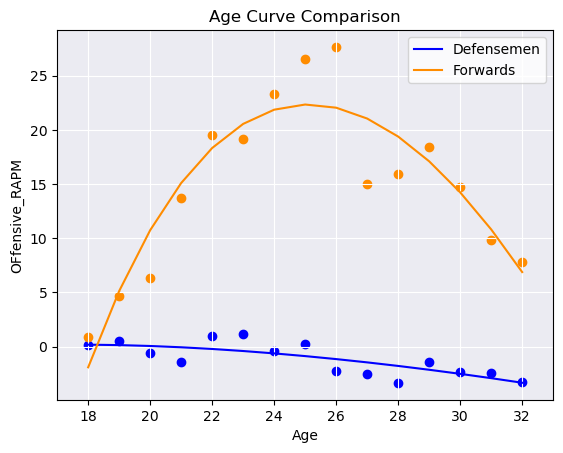

In [126]:
####################################################################################################################
AVG_RAPM_BY_AGE_F = Player_metric_DF
AVG_RAPM_BY_AGE_F = Player_metric_DF
AVG_RAPM_BY_AGE_F = AVG_RAPM_BY_AGE_F[AVG_RAPM_BY_AGE_F['Position']!='D']
AVG_RAPM_BY_AGE_F = AVG_RAPM_BY_AGE_F[AVG_RAPM_BY_AGE_F['Games_Played']>=60]
AVG_RAPM_BY_AGE_F = AVG_RAPM_BY_AGE_F.groupby(['Age'], as_index=False)['Offensive_RAPM'].sum()
AVG_RAPM_BY_AGE_F = pd.DataFrame(AVG_RAPM_BY_AGE_F)
AVG_RAPM_BY_AGE_F = AVG_RAPM_BY_AGE_F[AVG_RAPM_BY_AGE_F['Age']<=32]
AVG_RAPM_BY_AGE_F = AVG_RAPM_BY_AGE_F[AVG_RAPM_BY_AGE_F['Age']>=18]


AVG_RAPM_BY_AGE_F['intercept'] = 1
AVG_RAPM_BY_AGE_F['Age2'] = AVG_RAPM_BY_AGE['Age']**2
AVG_RAPM_BY_AGE_F['Age_x'] = 1/AVG_RAPM_BY_AGE['Age']
x_F = AVG_RAPM_BY_AGE_F[['intercept','Age2','Age_x']]
y_F = AVG_RAPM_BY_AGE_F['Offensive_RAPM']

agecurve_F = sm.OLS(y_F,x_F)
results_F = agecurve_F.fit()

age_curve_vals_F = results_F.predict(x_F)
####################################################################################################################
AVG_RAPM_BY_AGE_D = Player_metric_DF
AVG_RAPM_BY_AGE_D = Player_metric_DF
AVG_RAPM_BY_AGE_D = AVG_RAPM_BY_AGE_D[AVG_RAPM_BY_AGE_D['Position']=='D']
AVG_RAPM_BY_AGE_D = AVG_RAPM_BY_AGE_D[AVG_RAPM_BY_AGE_D['Games_Played']>=60]
AVG_RAPM_BY_AGE_D = AVG_RAPM_BY_AGE_D.groupby(['Age'], as_index=False)['Offensive_RAPM'].sum()
AVG_RAPM_BY_AGE_D = pd.DataFrame(AVG_RAPM_BY_AGE_D)
AVG_RAPM_BY_AGE_D = AVG_RAPM_BY_AGE_D[AVG_RAPM_BY_AGE_D['Age']<=32]
AVG_RAPM_BY_AGE_D = AVG_RAPM_BY_AGE_D[AVG_RAPM_BY_AGE_D['Age']>=18]

AVG_RAPM_BY_AGE_D['intercept'] = 1
AVG_RAPM_BY_AGE_D['Age'] = AVG_RAPM_BY_AGE['Age']**2
AVG_RAPM_BY_AGE_D['Age_x'] = 1/AVG_RAPM_BY_AGE['Age']
x_D = AVG_RAPM_BY_AGE_D[['intercept','Age','Age_x']]
y_D = AVG_RAPM_BY_AGE_D['Offensive_RAPM']


agecurve_D = sm.OLS(y_D,x_D)
results_D = agecurve_D.fit()


age_curve_vals_D = results_D.predict(x_D)
####################################################################################################################



ax = plt.subplot()

#ax.plot(AVG_RAPM_BY_AGE_F['Age'], age_curve_vals_C, color='red', label = 'Centers')
#ax.plot(AVG_RAPM_BY_AGE_F['Age'], age_curve_vals_W, color='green', label = 'Wingers')
ax.plot(AVG_RAPM_BY_AGE_F['Age'], age_curve_vals_D, color='blue', label = 'Defensemen')
ax.plot(AVG_RAPM_BY_AGE_F['Age'], age_curve_vals_F, color='darkorange', label = 'Forwards')
ax.scatter(AVG_RAPM_BY_AGE_F['Age'], AVG_RAPM_BY_AGE_D['Offensive_RAPM'], color='blue')
ax.scatter(AVG_RAPM_BY_AGE_F['Age'], AVG_RAPM_BY_AGE_F['Offensive_RAPM'], color='darkorange')

ax.set_title('Age Curve Comparison')
ax.set_ylabel('OFfensive_RAPM')
ax.set_xlabel('Age')
ax.grid(True)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))
ax.set_xlim(17, 33)
ax.legend(loc='upper right')

In [13]:
draft_pick_count = Player_metric_DF
#AVG_RAPM_BY_AGE = AVG_RAPM_BY_AGE[AVG_RAPM_BY_AGE['Position']!='D']
draft_pick_count = draft_pick_count[draft_pick_count['Draft_Year']!='undrafted']
draft_pick_count = draft_pick_count.groupby(['Draft_Year'], as_index=False)['Player'].count()
draft_pick_count = pd.DataFrame(draft_pick_count)
#draft_pick_count = draft_pick_count[draft_pick_count['Age']<=35]


([<matplotlib.axis.XTick at 0x14e07305280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

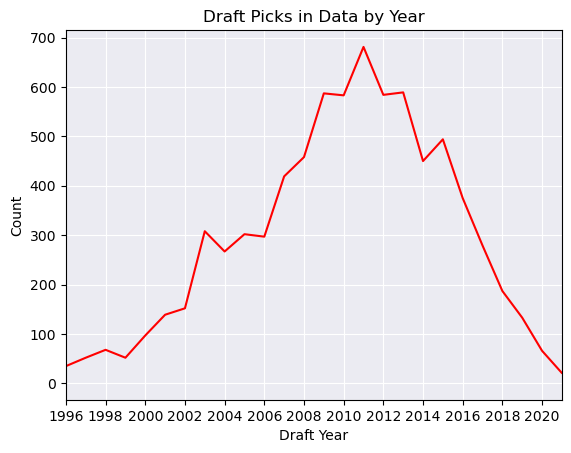

In [14]:
ax = plt.subplot()

ax.plot(draft_pick_count['Draft_Year'], draft_pick_count['Player'], color='red', label = 'All Skaters')



ax.set_title('Draft Picks in Data by Year')
ax.set_ylabel('Count')
ax.set_xlabel('Draft Year')
ax.grid(True)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))
ax.set_xlim(7, 32)
plt.xticks(ticks=range(7,32,2))


In [297]:
Player_metric_DF = pd.read_csv(r"C:\Users\jorda\Documents\Concordia Boot Camp\Lectures\NHL_Player_Metrics_P20.csv")
draft_pick_value_RAPM = Player_metric_DF

minimum = draft_pick_value_RAPM['Overall_RAPM_Total'].min()
maximum = draft_pick_value_RAPM['Overall_RAPM_Total'].max()

draft_pick_value_RAPM['Overall_RAPM_Total'] = (draft_pick_value_RAPM['Overall_RAPM_Total'] - minimum) / ((minimum*-1)+maximum)
#draft_pick_value_RAPM['Overall_RAPM_Total'] = (draft_pick_value_RAPM['Overall_RAPM_Total'] - minimum)


#draft_pick_value = draft_pick_value[draft_pick_value['Position']=='C']
draft_pick_value_RAPM = draft_pick_value_RAPM[draft_pick_value_RAPM['Draft_Year']!='undrafted']
draft_pick_value_RAPM = draft_pick_value_RAPM[draft_pick_value_RAPM['Age']>=18]
draft_pick_value_RAPM = draft_pick_value_RAPM[draft_pick_value_RAPM['Age']<=25]
draft_pick_value_RAPM['Draft_Year'] = draft_pick_value_RAPM['Draft_Year'].fillna(0)
draft_pick_value_RAPM['Draft_Rank'] = draft_pick_value_RAPM['Draft_Rank'].fillna(0)
draft_pick_value_RAPM['Draft_Year'] = draft_pick_value_RAPM['Draft_Year'].astype(int)
draft_pick_value_RAPM['Draft_Rank'] = draft_pick_value_RAPM['Draft_Rank'].astype(int)

draft_pick_value_RAPM = draft_pick_value_RAPM[draft_pick_value_RAPM['Draft_Rank']>=1]
draft_pick_value_RAPM = draft_pick_value_RAPM[draft_pick_value_RAPM['Draft_Rank']<=211]

#draft_pick_value = draft_pick_value[draft_pick_value['Games_Played']>=10]

draft_pick_value_RAPM = draft_pick_value_RAPM[draft_pick_value_RAPM['Draft_Year']>=2003]
draft_pick_value_RAPM = draft_pick_value_RAPM[draft_pick_value_RAPM['Draft_Year']<=2017]

draft_pick_value_RAPM = draft_pick_value_RAPM.groupby(['Player','Player_Id','Draft_Rank'], as_index=False)[['Overall_RAPM_Total','Offensive_RAPM_Total','Defensive_RAPM_Total','total','Offensive_RAPM','Defensive_RAPM','Games_Played']].mean()
draft_pick_value_RAPM = draft_pick_value_RAPM[draft_pick_value_RAPM['Games_Played']>=40]
draft_pick_value_RAPM = draft_pick_value_RAPM.groupby(['Draft_Rank'], as_index=False)[['Overall_RAPM_Total','Offensive_RAPM_Total','Defensive_RAPM_Total','total','Offensive_RAPM','Defensive_RAPM']].sum()

#draft_pick_value = draft_pick_value.sort_values(by='Draft_Rank', ascending=True)
draft_pick_value_RAPM

,Draft_Rank,Overall_RAPM_Total,Offensive_RAPM_Total,Defensive_RAPM_Total,total,Offensive_RAPM,Defensive_RAPM
0,1,5.023931,82.666887,12.108735,2.587984,3.121407,0.533422
1,2,4.194127,40.286624,25.405115,0.642058,1.399658,0.757600
2,3,4.598355,56.273663,14.270037,1.503933,2.213058,0.709125
3,4,3.802391,26.433697,-6.585220,1.408910,0.990448,-0.418462
4,5,3.323809,13.714451,-9.404170,0.882496,0.563917,-0.318579
...,...,...,...,...,...,...,...
163,205,0.410605,2.415121,-2.924224,0.458337,0.241503,-0.216834
164,206,0.376404,0.958719,-2.085880,0.155095,0.032208,-0.122887
165,207,0.321622,-1.317213,-0.686146,-0.082501,-0.125477,-0.042976
166,208,0.433456,6.023733,-0.848801,0.251077,0.225431,-0.025646


([<matplotlib.axis.XTick at 0x14e10478df0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

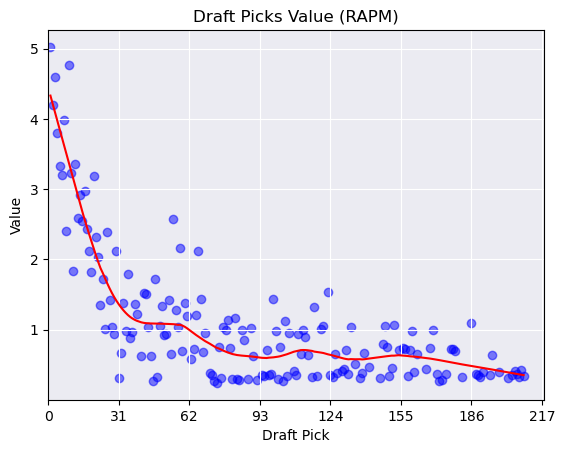

In [298]:
Lowess_Overall_All_Skaters_RAPM = lowess(draft_pick_value_RAPM['Overall_RAPM_Total'], draft_pick_value_RAPM['Draft_Rank'], frac=0.2, it=1)
Lowess_Overall_All_Skaters_RAPM = pd.DataFrame(Lowess_Overall_All_Skaters_RAPM, columns = ['Draft_Rank','Overall_RAPM_Total',])

ax = plt.subplot()

ax.scatter(draft_pick_value_RAPM['Draft_Rank'], draft_pick_value_RAPM['Overall_RAPM_Total'], color='blue', alpha=0.5, label = 'All Skaters')
ax.plot(Lowess_Overall_All_Skaters_RAPM['Draft_Rank'], Lowess_Overall_All_Skaters_RAPM['Overall_RAPM_Total'], color='red', alpha=1, label = 'Centers')

ax.set_title('Draft Picks Value (RAPM)')
ax.set_ylabel('Value')
ax.set_xlabel('Draft Pick')
ax.grid(True)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))
ax.set_xlim(0, 218)
plt.xticks(ticks=range(0,218,31))


In [299]:
draft_pick_value = Player_metric_DF

draft_pick_value = draft_pick_value[draft_pick_value['Age']>=18]
draft_pick_value = draft_pick_value[draft_pick_value['Age']<=25]

draft_pick_value = draft_pick_value[draft_pick_value['Draft_Rank']!='undrafted']

draft_pick_value['Draft_Year'] = draft_pick_value['Draft_Year'].fillna(0)
draft_pick_value['Draft_Rank'] = draft_pick_value['Draft_Rank'].fillna(0)
draft_pick_value['Draft_Year'] = draft_pick_value['Draft_Year'].astype(int)
draft_pick_value['Draft_Rank'] = draft_pick_value['Draft_Rank'].astype(int)

draft_pick_value = draft_pick_value[draft_pick_value['Draft_Rank']>=1]
draft_pick_value = draft_pick_value[draft_pick_value['Draft_Rank']<=211]

draft_pick_value['Draft_Year'] = draft_pick_value['Draft_Year'].astype(int)
draft_pick_value = draft_pick_value[draft_pick_value['Draft_Year']>=2003]
draft_pick_value = draft_pick_value[draft_pick_value['Draft_Year']<=2017]


draft_pick_value = draft_pick_value.groupby(['Player','Player_Id','Draft_Rank'], as_index=False)['Games_Played'].sum()

draft_pick_value['played_400'] = draft_pick_value['Games_Played']>=200
draft_pick_value['played_400'] = draft_pick_value['played_400'].astype(int)
draft_pick_value = draft_pick_value[draft_pick_value['Games_Played']>=200]

draft_pick_value = draft_pick_value.groupby(['Draft_Rank'], as_index=False)['played_400'].sum()
draft_pick_value

,Draft_Rank,played_400
0,1,10
1,2,9
2,3,9
3,4,9
4,5,7
...,...,...
125,182,1
126,189,1
127,204,1
128,205,1


([<matplotlib.axis.XTick at 0x14e0fb240d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

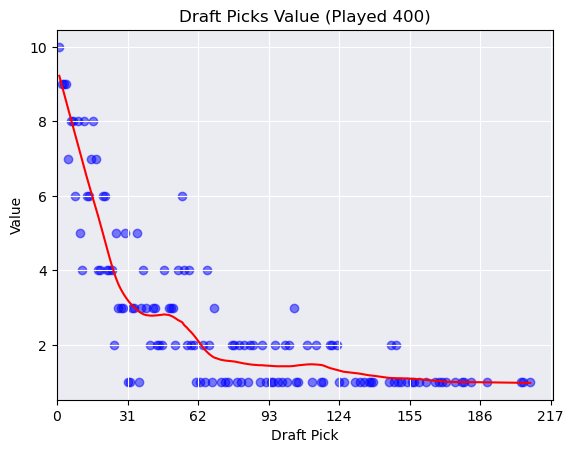

In [300]:
Lowess_Overall_All_Skaters = lowess(draft_pick_value['played_400'], draft_pick_value['Draft_Rank'], frac=0.2, it=1)
Lowess_Overall_All_Skaters = pd.DataFrame(Lowess_Overall_All_Skaters, columns = ['Draft_Rank','played_400'])

ax = plt.subplot()

ax.scatter(Lowess_Overall_All_Skaters['Draft_Rank'], draft_pick_value['played_400'], color='blue', alpha=0.5, label = 'All Skaters')
ax.plot(Lowess_Overall_All_Skaters['Draft_Rank'], Lowess_Overall_All_Skaters['played_400'], color='red', alpha=1, label = 'Centers')

ax.set_title('Draft Picks Value (Played 400)')
ax.set_ylabel('Value')
ax.set_xlabel('Draft Pick')
ax.grid(True)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))
ax.set_xlim(0, 218)
plt.xticks(ticks=range(0,218,31))


In [302]:
Lowess_Overall_All_Skaters_RAPM['Overall_RAPM_Total'] = Lowess_Overall_All_Skaters_RAPM['Overall_RAPM_Total']/1.084821

Lowess_Overall_All_Skaters_RAPM.mean()

Draft_Rank            93.803571
Overall_RAPM_Total     1.000000
dtype: float64

In [304]:
Lowess_Overall_All_Skaters['played_400'] = Lowess_Overall_All_Skaters['played_400']/2.732027

Lowess_Overall_All_Skaters.mean()

Draft_Rank    80.023077
played_400     1.000000
dtype: float64

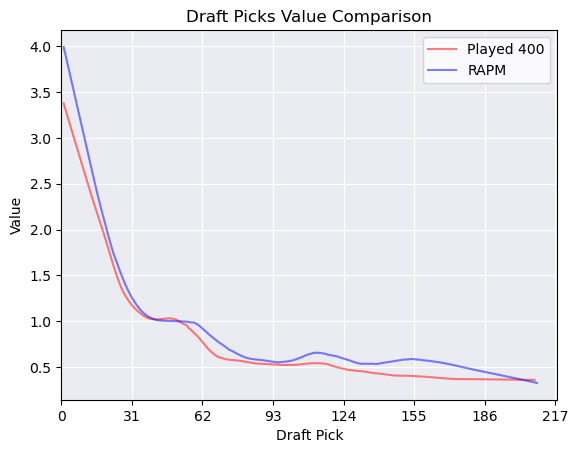

In [305]:
ax = plt.subplot()

ax.plot(Lowess_Overall_All_Skaters['Draft_Rank'], Lowess_Overall_All_Skaters['played_400'], color='red', alpha=0.5, label = 'Played 400')
ax.plot(Lowess_Overall_All_Skaters_RAPM['Draft_Rank'], Lowess_Overall_All_Skaters_RAPM['Overall_RAPM_Total'], color='blue', alpha=0.5, label = 'RAPM')

ax.set_title('Draft Picks Value Comparison')
ax.set_ylabel('Value')
ax.set_xlabel('Draft Pick')
ax.grid(True)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))
ax.set_xlim(0, 218)
plt.xticks(ticks=range(0,218,31))
ax.legend(loc='upper right')

In [309]:
Player_metric_DF = pd.read_csv(r"C:\Users\jorda\Documents\Concordia Boot Camp\Lectures\NHL_Player_Metrics_P20.csv")
draft_pick_value_undrafted = Player_metric_DF

minimum = draft_pick_value_RAPM['Overall_RAPM_Total'].min()
maximum = draft_pick_value_RAPM['Overall_RAPM_Total'].max()

draft_pick_value_undrafted['Overall_RAPM_Total'] = (draft_pick_value_undrafted['Overall_RAPM_Total'] - minimum) / ((minimum*-1)+maximum)
#draft_pick_value_undrafted['Overall_RAPM_Total'] = (draft_pick_value_undrafted['Overall_RAPM_Total'] - minimum)

draft_pick_value_undrafted = draft_pick_value_undrafted[draft_pick_value_undrafted['Draft_Year']=='undrafted']
draft_pick_value_undrafted = draft_pick_value_undrafted[draft_pick_value_undrafted['Age']>=18]
draft_pick_value_undrafted = draft_pick_value_undrafted[draft_pick_value_undrafted['Age']<=25]

draft_pick_value_undrafted = draft_pick_value_undrafted.groupby(['Player','Player_Id','Draft_Rank'], as_index=False)[['Overall_RAPM_Total','Offensive_RAPM_Total','Defensive_RAPM_Total','total','Offensive_RAPM','Defensive_RAPM','Games_Played']].mean()
draft_pick_value_undrafted = draft_pick_value_undrafted[draft_pick_value_undrafted['Games_Played']>=40]
draft_pick_value_undrafted = draft_pick_value_undrafted.groupby(['Draft_Rank'], as_index=False)[['Overall_RAPM_Total','Offensive_RAPM_Total','Defensive_RAPM_Total','total','Offensive_RAPM','Defensive_RAPM']].sum()

#draft_pick_value = draft_pick_value.sort_values(by='Draft_Rank', ascending=True)
draft_pick_value_undrafted

,Draft_Rank,Overall_RAPM_Total,Offensive_RAPM_Total,Defensive_RAPM_Total,total,Offensive_RAPM,Defensive_RAPM
0,undrafted,2.984396,-19.387685,-46.077341,1.829067,-1.634511,-3.463578


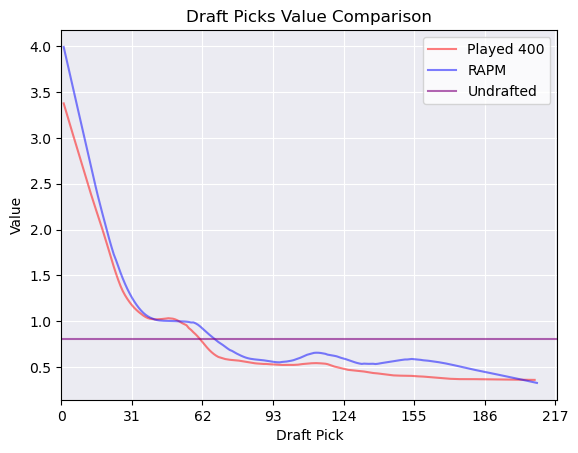

In [322]:
ax = plt.subplot()

ax.plot(Lowess_Overall_All_Skaters['Draft_Rank'], Lowess_Overall_All_Skaters['played_400'], color='red', alpha=0.5, label = 'Played 400')
ax.plot(Lowess_Overall_All_Skaters_RAPM['Draft_Rank'], Lowess_Overall_All_Skaters_RAPM['Overall_RAPM_Total'], color='blue', alpha=0.5, label = 'RAPM')
ax.axhline(y=0.808, color='purple', linestyle='-', alpha=0.6, label = 'Undrafted')


ax.set_title('Draft Picks Value Comparison')
ax.set_ylabel('Value')
ax.set_xlabel('Draft Pick')
ax.grid(True)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))
ax.set_xlim(0, 218)
plt.xticks(ticks=range(0,218,31))
ax.legend(loc='upper right')

In [393]:
Player_metric_DF = pd.read_csv(r"C:\Users\jorda\Documents\Concordia Boot Camp\Lectures\NHL_Player_Metrics_P20.csv")
draft_pick_value_young = Player_metric_DF

draft_pick_value_young = draft_pick_value_young[draft_pick_value_young['Draft_Year']!='undrafted']
draft_pick_value_young['Draft_Year'] = draft_pick_value_young['Draft_Year'].fillna(0)
draft_pick_value_young['Birth_Year'] = draft_pick_value_young['Birth_Year'].fillna(0)

draft_pick_value_young['Draft_Year'] = draft_pick_value_young['Draft_Year'].astype(int)
draft_pick_value_young['Birth_Year'] = draft_pick_value_young['Birth_Year'].astype(int)

draft_pick_value_young=draft_pick_value_young[draft_pick_value_young['Draft_Year']>=2000]

draft_pick_value_young = draft_pick_value_young.reset_index()

draft_pick_value_young = draft_pick_value_young.drop('level_0', axis=1)
draft_pick_value_young = draft_pick_value_young.drop('index', axis=1)

draft_pick_value_young['Draft_Age_Years'] = draft_pick_value_young['Draft_Year']-draft_pick_value_young['Birth_Year']

#draft_pick_value_young['Draft_Age_Years'] = draft_pick_value_young.apply(lambda x: x['Draft_Year'] - x['Birth_Year'], axis=1)

#for i in draft_pick_value_young.index:
#    draft_pick_value_young.at[i, 'Draft_Age_Years'] = (draft_pick_value_young.at[i, 'Draft_Year'])-(draft_pick_value_young.at[i, 'Birth_Year'])

draft_pick_value_young['drafted_young'] = (draft_pick_value_young['Draft_Age_Years']==18) & draft_pick_value_young['Birth_Month'].isin(['July','August','September'])

draft_pick_value_young=draft_pick_value_young[['Player','Player_Id','Birth_Year','Birth_Month','Draft_Year','Draft_Rank','Overall_RAPM_Total','drafted_young','Age','Games_Played']]

minimum = draft_pick_value_young['Overall_RAPM_Total'].min()
maximum = draft_pick_value_young['Overall_RAPM_Total'].max()

draft_pick_value_young['Overall_RAPM_Total'] = (draft_pick_value_young['Overall_RAPM_Total'] - minimum) / ((minimum*-1)+maximum)
#draft_pick_value_young['Overall_RAPM_Total'] = (draft_pick_value_young['Overall_RAPM_Total'] - minimum)

draft_pick_value_young = draft_pick_value_young[draft_pick_value_young['Age']>=18]
draft_pick_value_young = draft_pick_value_young[draft_pick_value_young['Age']<=25]

draft_pick_value_young = draft_pick_value_young.groupby(['Player','Player_Id','Draft_Rank'], as_index=False)[['Overall_RAPM_Total','Games_Played']].mean()
draft_pick_value_young = draft_pick_value_young[draft_pick_value_young['Games_Played']>=40]
draft_pick_value_young = draft_pick_value_young.groupby(['Draft_Rank'], as_index=False)[['Overall_RAPM_Total']].sum()

#draft_pick_value = draft_pick_value.sort_values(by='Draft_Rank', ascending=True)
draft_pick_value_young

C:\Users\jorda\AppData\Local\Temp\ipykernel_16484\4057264127.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft_pick_value_young['Draft_Year'] = draft_pick_value_young['Draft_Year'].fillna(0)
C:\Users\jorda\AppData\Local\Temp\ipykernel_16484\4057264127.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft_pick_value_young['Birth_Year'] = draft_pick_value_young['Birth_Year'].fillna(0)
C:\Users\jorda\AppData\Local\Temp\ipykernel_16484\4057264127.py:8: SettingWithCopyWarning: 
A value is trying to b

,Draft_Rank,Overall_RAPM_Total
0,1,6.036305
1,10,3.918852
2,100,0.987133
3,101,0.296080
4,102,1.068247
...,...,...
167,95,0.339045
168,96,0.708484
169,97,0.361638
170,98,0.368926


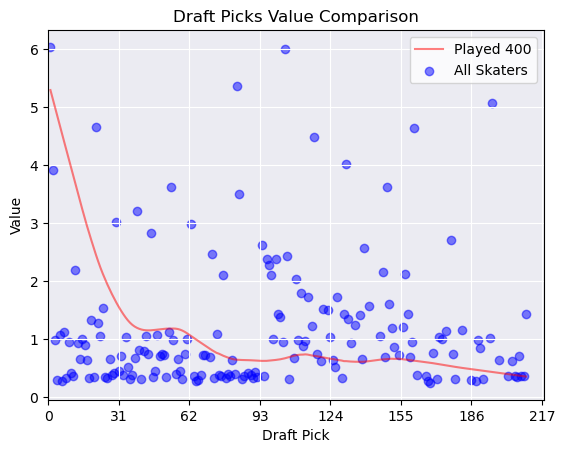

In [394]:
Lowess_Overall_young = lowess(draft_pick_value_young['Overall_RAPM_Total'], draft_pick_value_young['Draft_Rank'], frac=0.2, it=1)
Lowess_Overall_young = pd.DataFrame(Lowess_Overall_young, columns = ['Draft_Rank','Overall_RAPM_Total'])

ax = plt.subplot()

ax.plot(Lowess_Overall_young['Draft_Rank'], Lowess_Overall_young['Overall_RAPM_Total'], color='red', alpha=0.5, label = 'Played 400')
ax.scatter(Lowess_Overall_young['Draft_Rank'], draft_pick_value_young['Overall_RAPM_Total'], color='blue', alpha=0.5, label = 'All Skaters')


ax.set_title('Draft Picks Value Comparison')
ax.set_ylabel('Value')
ax.set_xlabel('Draft Pick')
ax.grid(True)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))
ax.set_xlim(0, 218)
plt.xticks(ticks=range(0,218,31))
ax.legend(loc='upper right')

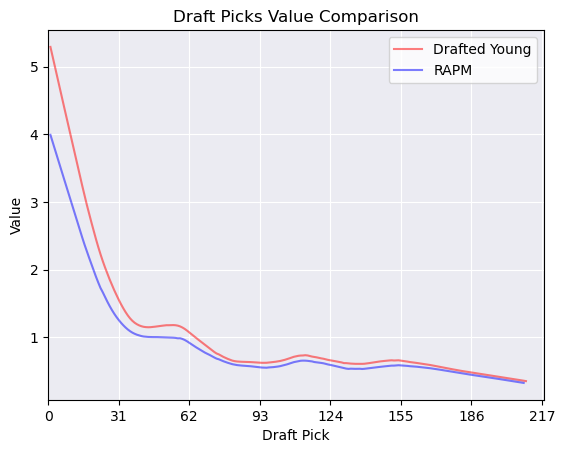

In [397]:
ax = plt.subplot()

ax.plot(Lowess_Overall_young['Draft_Rank'], Lowess_Overall_young['Overall_RAPM_Total'], color='red', alpha=0.5, label = 'Drafted Young')
ax.plot(Lowess_Overall_All_Skaters_RAPM['Draft_Rank'], Lowess_Overall_All_Skaters_RAPM['Overall_RAPM_Total'], color='blue', alpha=0.5, label = 'RAPM')


ax.set_title('Draft Picks Value Comparison')
ax.set_ylabel('Value')
ax.set_xlabel('Draft Pick')
ax.grid(True)
ax.grid(color='white')
ax.set_facecolor((0.92,0.92,0.95))
ax.set_xlim(0, 218)
plt.xticks(ticks=range(0,218,31))
ax.legend(loc='upper right')